# Speed Regression

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import importlib
import pandas
import sklearn.svm as svm
from sklearn.externals import joblib
import numpy as np
from speed_regression import training_data as td
nano_to_sec = 1e09

### Direct feature, step=50, window=200, use gyroscop and linear acceleration

<IPython.core.display.Javascript object>


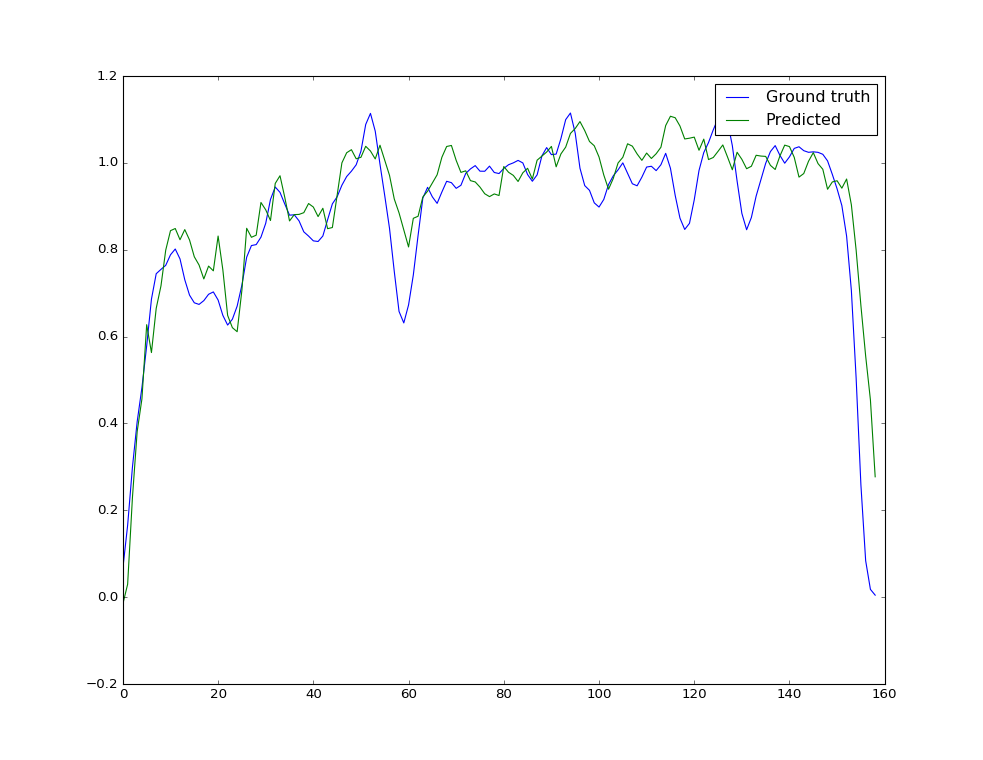

In [2]:
data_all = pandas.read_csv('../../data/20170126025407/processed/data.csv')
time_stamp = data_all['time'].values / nano_to_sec
options = td.TrainingDataOption(sample_step=50, window_size=200, feature='direct', discard_direct=True)
imu_columns = ['gyro_w', 'gyro_x', 'gyro_y', 'gyro_z', 'linacce_x', 'linacce_y', 'linacce_z']
test_set = td.get_training_data(data_all=data_all, imu_columns=imu_columns, option=options)

regressor = joblib.load('../../models/model_walk_direct_step50_w200.svm')
predicted = regressor.predict(test_set[:, :-1])

plt.figure()
plt.plot(test_set[:, -1])
plt.plot(predicted)
plt.legend(['Ground truth', 'Predicted'])

### Direct Feature, step 10

<IPython.core.display.Javascript object>


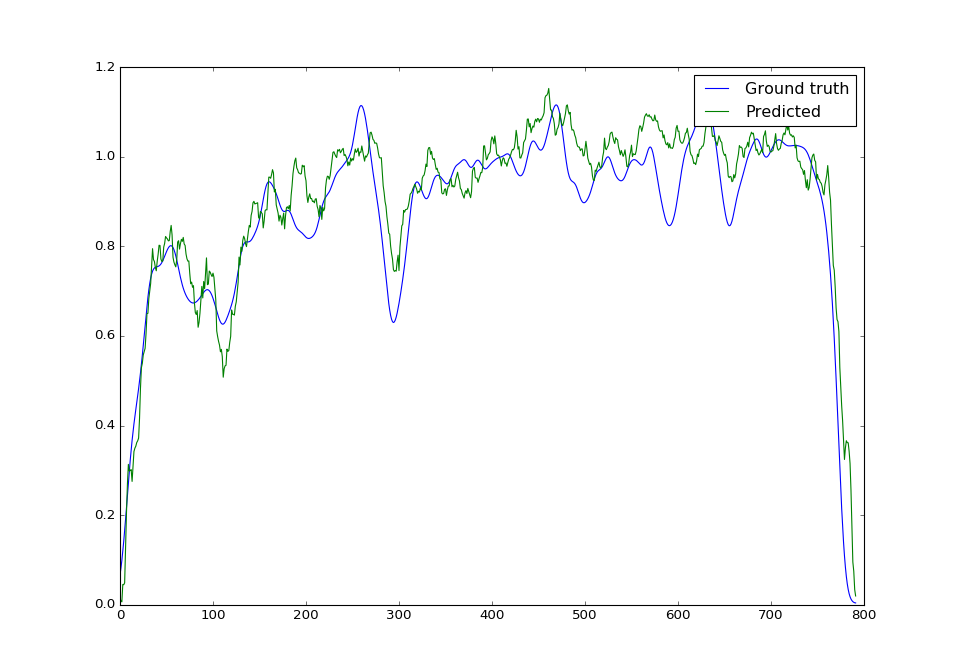

In [6]:
data_all = pandas.read_csv('../../data/20170126025407/processed/data.csv')
time_stamp = data_all['time'].values / nano_to_sec
options = td.TrainingDataOption(sample_step=10, window_size=200, feature='direct', discard_direct=True)
imu_columns = ['gyro_w', 'gyro_x', 'gyro_y', 'gyro_z', 'linacce_x', 'linacce_y', 'linacce_z']
test_set = td.get_training_data(data_all=data_all, imu_columns=imu_columns, option=options)

regressor = joblib.load('../../models/model_walk_direct_step10_w200.svm')
predicted = regressor.predict(test_set[:, :-1])

plt.figure()
plt.plot(test_set[:, -1])
plt.plot(predicted)
plt.legend(['Ground truth', 'Predicted'])

### Fourier Feature, step 50

<IPython.core.display.Javascript object>


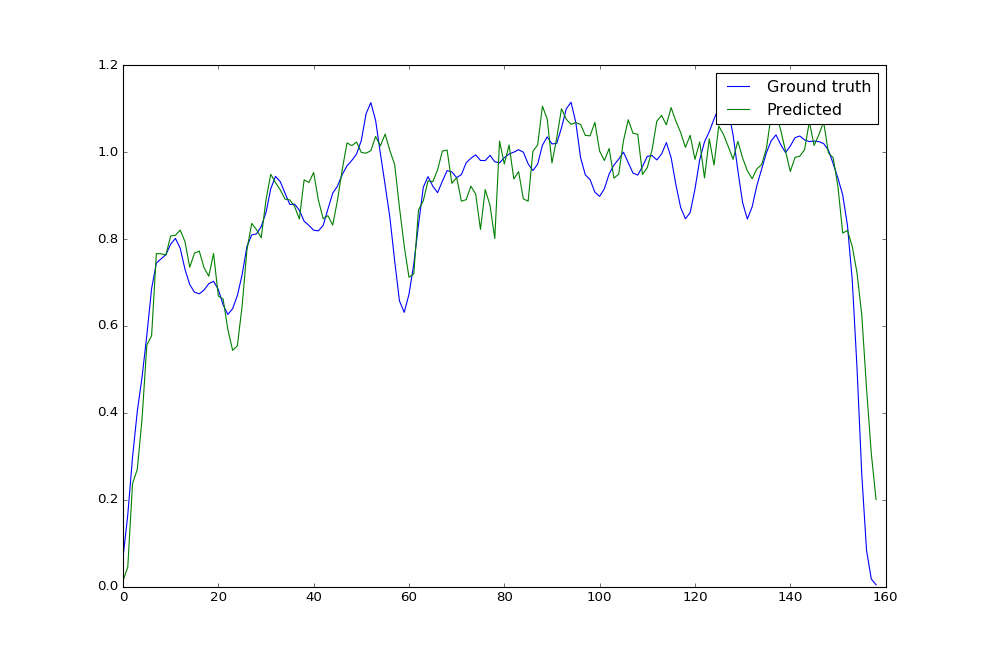

In [7]:
data_all = pandas.read_csv('../../data/20170126025407/processed/data.csv')
time_stamp = data_all['time'].values / nano_to_sec
options = td.TrainingDataOption(sample_step=50, window_size=200, feature='fourier', discard_direct=True)
imu_columns = ['gyro_w', 'gyro_x', 'gyro_y', 'gyro_z', 'linacce_x', 'linacce_y', 'linacce_z']
test_set = td.get_training_data(data_all=data_all, imu_columns=imu_columns, option=options)

regressor = joblib.load('../../models/model_walk_fourier_step50_w200.svm')
predicted = regressor.predict(test_set[:, :-1])

plt.figure()
plt.plot(test_set[:, -1])
plt.plot(predicted)
plt.legend(['Ground truth', 'Predicted'])

### Fourier Feature, step 10

<IPython.core.display.Javascript object>


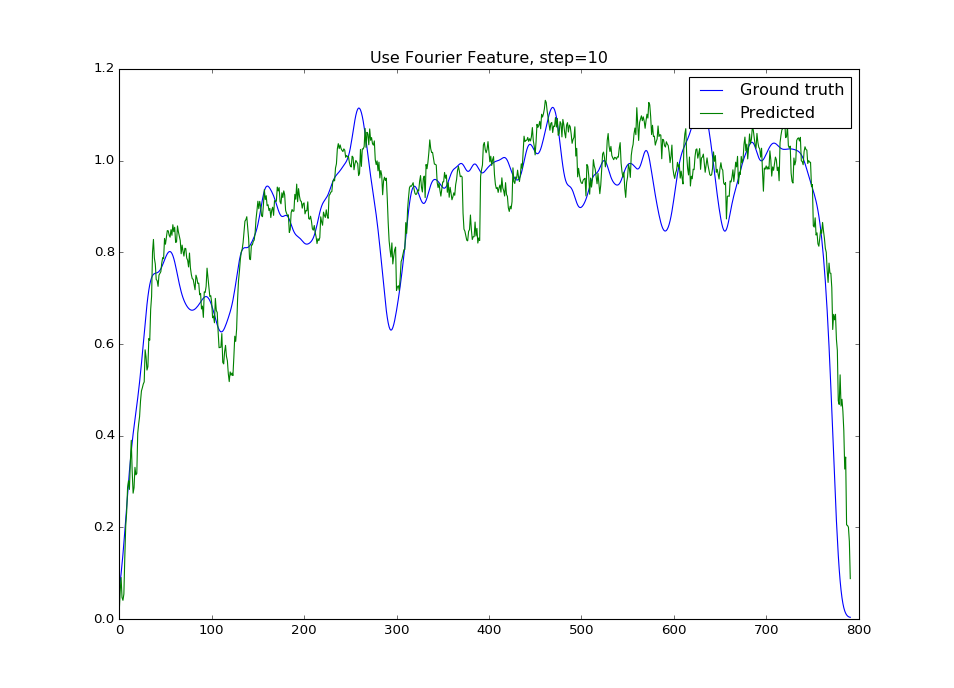

In [12]:
data_all = pandas.read_csv('../../data/20170126025407/processed/data.csv')
time_stamp = data_all['time'].values / nano_to_sec
options = td.TrainingDataOption(sample_step=10, window_size=200, feature='fourier', discard_direct=True)
imu_columns = ['gyro_w', 'gyro_x', 'gyro_y', 'gyro_z', 'linacce_x', 'linacce_y', 'linacce_z']
test_set = td.get_training_data(data_all=data_all, imu_columns=imu_columns, option=options)

regressor = joblib.load('../../models/model_walk_fourier_step10_w200.svm')
predicted = regressor.predict(test_set[:, :-1])

plt.figure()
plt.plot(test_set[:, -1])
plt.plot(predicted)
plt.title('Use Fourier Feature, step=10')
plt.legend(['Ground truth', 'Predicted'])

<IPython.core.display.Javascript object>


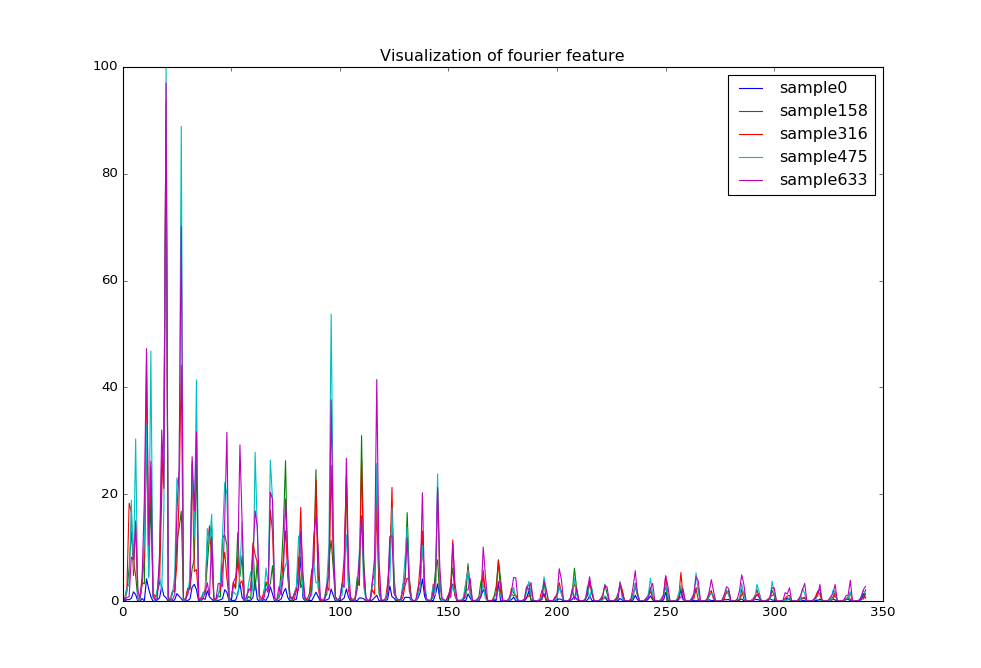

In [13]:
# plot fourier feature, evaluate the previous cell first!
plt.figure()
sample_points = np.linspace(0, test_set.shape[0], 5, endpoint=False, dtype=np.int)
legends = ['sample{}'.format(i) for i in sample_points]
for i in sample_points:
    plt.plot(test_set[i, :-1])
plt.title('Visualization of fourier feature')
plt.legend(legends)

<IPython.core.display.Javascript object>


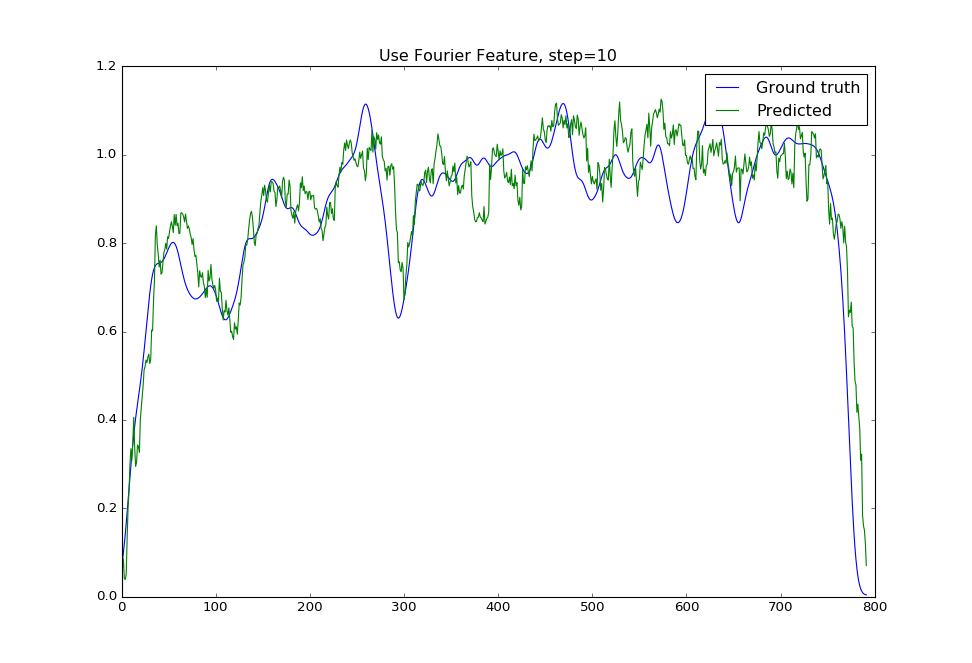

In [3]:
### Fourier feature, step 10, with direct component
data_all = pandas.read_csv('../../data/20170126025407/processed/data.csv')
time_stamp = data_all['time'].values / nano_to_sec
options = td.TrainingDataOption(sample_step=10, window_size=200, feature='fourier')
imu_columns = ['gyro_w', 'gyro_x', 'gyro_y', 'gyro_z', 'linacce_x', 'linacce_y', 'linacce_z']
test_set = td.get_training_data(data_all=data_all, imu_columns=imu_columns, option=options)

regressor = joblib.load('../../models/model_walk_fourier_step10_w200_withdirect.svm')
predicted = regressor.predict(test_set[:, :-1])

plt.figure()
plt.plot(test_set[:, -1])
plt.plot(predicted)
plt.title('Use Fourier Feature, step=10')
plt.legend(['Ground truth', 'Predicted'])

## Gaussian Process

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True, kernel=None,
             n_restarts_optimizer=0, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)


<IPython.core.display.Javascript object>


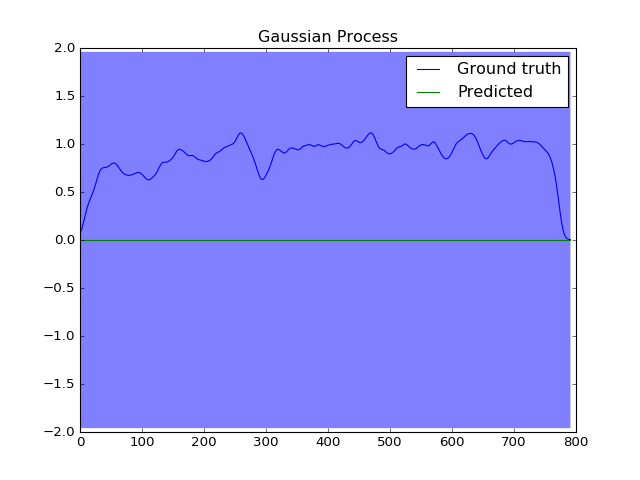

In [12]:
### Fourier feature, step 10, with direct component
data_all = pandas.read_csv('../../data/20170126025407/processed/data.csv')
time_stamp = data_all['time'].values / nano_to_sec
options = td.TrainingDataOption(sample_step=10, window_size=200, feature='fourier')
imu_columns = ['gyro_w', 'gyro_x', 'gyro_y', 'gyro_z', 'linacce_x', 'linacce_y', 'linacce_z']
test_set = td.get_training_data(data_all=data_all, imu_columns=imu_columns, option=options)

regressor = joblib.load('../../models/model_walk_fourier_step10_w200_withdirect.gp')
print(regressor)
predicted, sigma = regressor.predict(test_set[:, :-1], return_std=True)

x = np.arange(0, test_set.shape[0])
plt.figure()
plt.plot(test_set[:, -1])
plt.plot(predicted)

plt.fill(np.concatenate([x, x[::-1]]),
        np.concatenate([predicted - 1.9600 * sigma, (predicted + 1.9600 * sigma)[::-1]]),
        alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.title('Gaussian Process')
plt.legend(['Ground truth', 'Predicted'])